In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
%matplotlib inline
sns.set_style(style='whitegrid')

In [3]:
from keys import keys
from binance.client import Client

In [4]:
client = Client(api_key=keys.apiKey, api_secret=keys.secretKey)

In [5]:
"""
The various columns used by Binance
taken from:
https://python-binance.readthedocs.io/en/latest/binance.html#module-binance.client
"""

columns = ['Open Time', 'Open', 'High', 'Low', 'Close',
            'Volume', 'Close Time', 'Quote asset volume', 
            'n_trades', 'Taker buy base asset volume', 
            'Taker buy quote asset volume', 'Ignore']

In [6]:
"""
DOWNLOADS DATA FROM BINANCE IN BATCHES OF 500 items

INPUTS:
    n_iterations: how many batches of 500 items to download
    
    currency: one of the varios currencies, examples: 
                'BTCUSDT', 'LTCUSDT' ...etc
    interval: dictionary, example: interval_5min = { 
                                        'interval' : Client.KLINE_INTERVAL_5MINUTE,
                                        'interval_diff' : 300000 
                                    }
            interval_diff: the difference in millisec of of new_data[1][0] - new_data[0][0]
            (the difference in binance timeframes of misurations)
"""
def get_by_intervals(n_iterations, currency, interval):
    df = pd.DataFrame(columns=columns)
    print(df)
    for i in range(0,n_iterations):
        if df.empty:
            new_data = client.get_klines(symbol=currency, 
                              interval=interval['interval'])
        else:
            end_time = df['Open Time'].iloc[0] - interval['interval_diff']
            new_data = client.get_klines(symbol=currency, 
                              interval=interval['interval'],
                              endTime=end_time
                             )
        
        new_data_df = pd.DataFrame(new_data, columns=columns)
        df = pd.concat([new_data_df,df])
    return df

In [7]:
interval_5min = { 'interval' : Client.KLINE_INTERVAL_5MINUTE,
                    'interval_diff': 300000 }

In [8]:
"""
USED TO TEST IF TIMESTAMPS ARE ALIGNED AND THERE ARE NO SUDDEN JUMPS
"""

def test_time_skip(i_init,i_end,df):
    for i in range(i_init,i_end):
        if (df['Open Time'].iloc[i+1] - df['Open Time'].iloc[i] != 300000):
            print('FUUUCK',(df['Open Time'].iloc[i+1] - df['Open Time'].iloc[i]), 
                df['Open Time'].iloc[i+1], df['Open Time'].iloc[i],i)

In [9]:
ltc_test = get_by_intervals(20, 'LTCUSDT', interval_5min)

Empty DataFrame
Columns: [Open Time, Open, High, Low, Close, Volume, Close Time, Quote asset volume, n_trades, Taker buy base asset volume, Taker buy quote asset volume, Ignore]
Index: []


In [10]:
ltc_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Open Time                     10000 non-null  object
 1   Open                          10000 non-null  object
 2   High                          10000 non-null  object
 3   Low                           10000 non-null  object
 4   Close                         10000 non-null  object
 5   Volume                        10000 non-null  object
 6   Close Time                    10000 non-null  object
 7   Quote asset volume            10000 non-null  object
 8   n_trades                      10000 non-null  object
 9   Taker buy base asset volume   10000 non-null  object
 10  Taker buy quote asset volume  10000 non-null  object
 11  Ignore                        10000 non-null  object
dtypes: object(12)
memory usage: 1015.6+ KB


In [11]:
ltc_test.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote asset volume,n_trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,1579980300000,53.57000000,53.58000000,53.38000000,53.38000000,632.57920000,1579980599999,33836.74429640,74,172.79818000,9244.80049830,0
1,1579980600000,53.38000000,53.57000000,53.38000000,53.43000000,760.52114000,1579980899999,40689.32234870,92,429.85255000,23003.21147490,0
2,1579980900000,53.44000000,53.64000000,53.43000000,53.61000000,886.83121000,1579981199999,47505.91231400,90,656.68728000,35187.97308180,0
3,1579981200000,53.62000000,53.76000000,53.61000000,53.70000000,1163.47783000,1579981499999,62442.15589090,182,509.65811000,27355.49212980,0
4,1579981500000,53.71000000,53.88000000,53.71000000,53.88000000,767.45981000,1579981799999,41317.04821770,173,522.86628000,28145.87709050,0


In [12]:
test_time_skip(0,999,ltc_test)

In [13]:
ltc_test[['Open','Close', 'High','Low', 'Volume', 'Quote asset volume', 
            'Taker buy base asset volume', 'Taker buy quote asset volume'
           ]] = ltc_test[['Open','Close', 'High','Low', 'Volume', 'Quote asset volume', 
            'Taker buy base asset volume', 'Taker buy quote asset volume']].astype(float)

In [14]:
ltc_test['Close Time'] = ltc_test['Close Time'].apply(
    lambda x: datetime.fromtimestamp(int(x/1000)))
ltc_test['Open Time'] = ltc_test['Open Time'].apply(
    lambda x: datetime.fromtimestamp(int(x/1000)))

In [15]:
ltc_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Open Time                     10000 non-null  datetime64[ns]
 1   Open                          10000 non-null  float64       
 2   High                          10000 non-null  float64       
 3   Low                           10000 non-null  float64       
 4   Close                         10000 non-null  float64       
 5   Volume                        10000 non-null  float64       
 6   Close Time                    10000 non-null  datetime64[ns]
 7   Quote asset volume            10000 non-null  float64       
 8   n_trades                      10000 non-null  object        
 9   Taker buy base asset volume   10000 non-null  float64       
 10  Taker buy quote asset volume  10000 non-null  float64       
 11  Ignore                        

In [16]:
print('Data timeframe:')
print( 'From:  ',ltc_test['Close Time'].max())
print( 'To     ',ltc_test['Close Time'].min())

Data timeframe:
From:   2020-02-29 20:34:59
To      2020-01-25 20:29:59


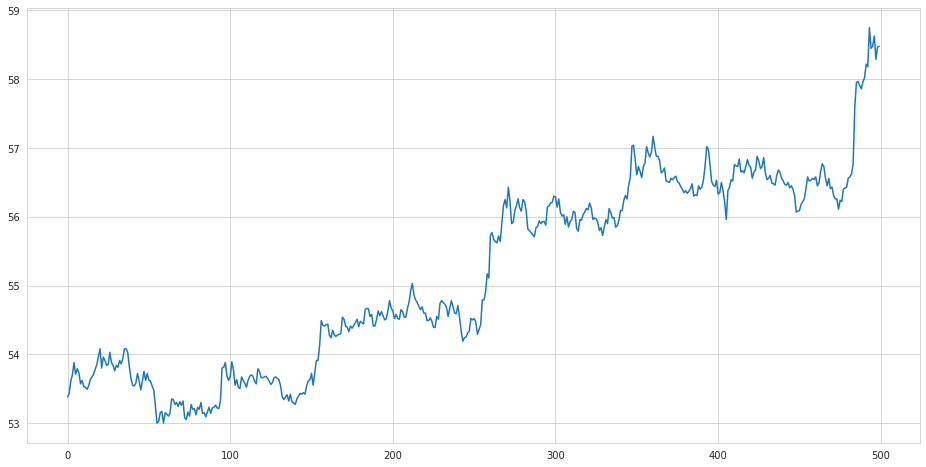

In [17]:
plt.figure(figsize=(16,8))
ltc_test['Close'].iloc[:500].plot()